In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import timeit

#from io import StringIO
#import pydotplus
#from IPython.display import Image
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error, f1_score, accuracy_score, make_scorer
from sklearn import tree

In [2]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#No null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

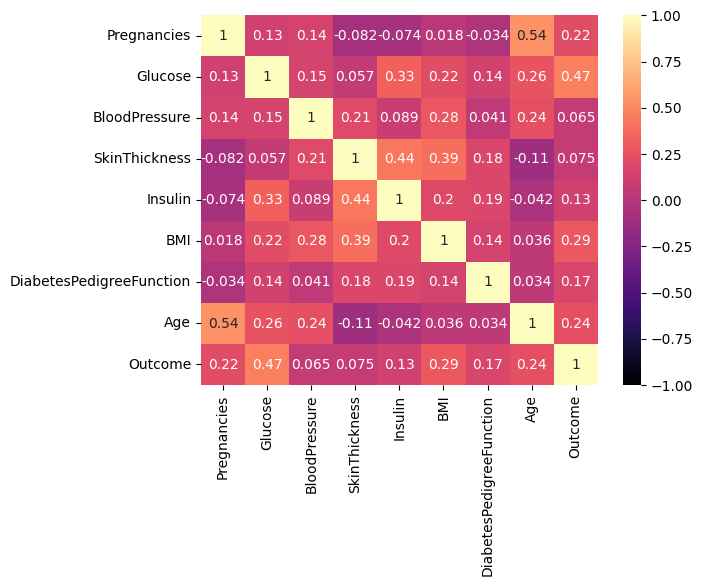

In [8]:
#Correlations for the Dataset

sns.heatmap(df.corr(), annot= True, cmap="magma", vmin=-1)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age')])

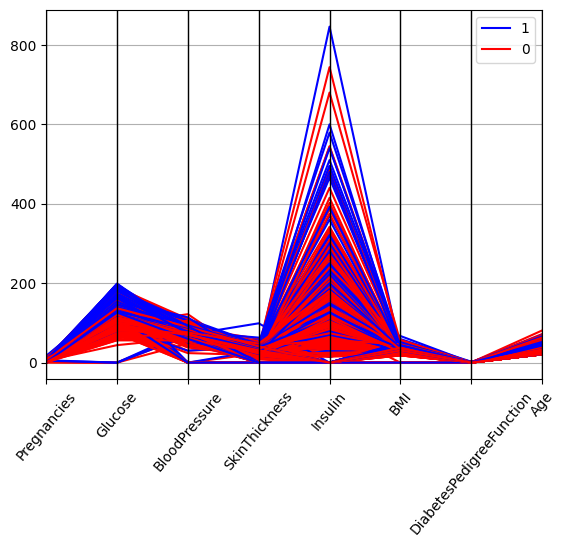

In [9]:
#Plotting Parallel Coordinates

pd.plotting.parallel_coordinates(df, "Outcome", color= ("blue", "red"))
plt.xticks(rotation = 50)

In [10]:
#Splitting the DataSet

X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size=0.2)

<Axes: ylabel='Frequency'>

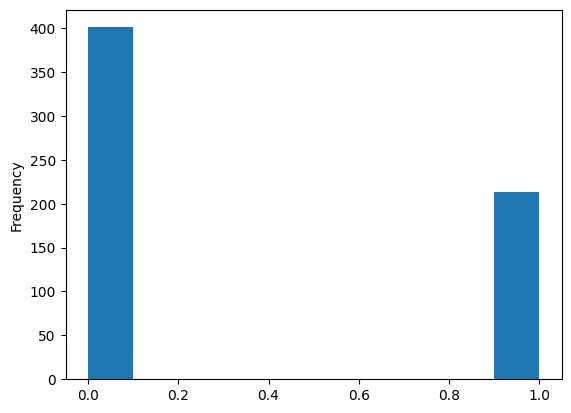

In [11]:
y_train.plot.hist() 

In [12]:
#Saving the Train and Test DataSets

X_train.to_csv("X_Train.csv")
y_train.to_csv("y_train.csv")
X_test.to_csv("X_test.csv")
y_test.to_csv("y_test.csv")

In [13]:
#Training the model

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

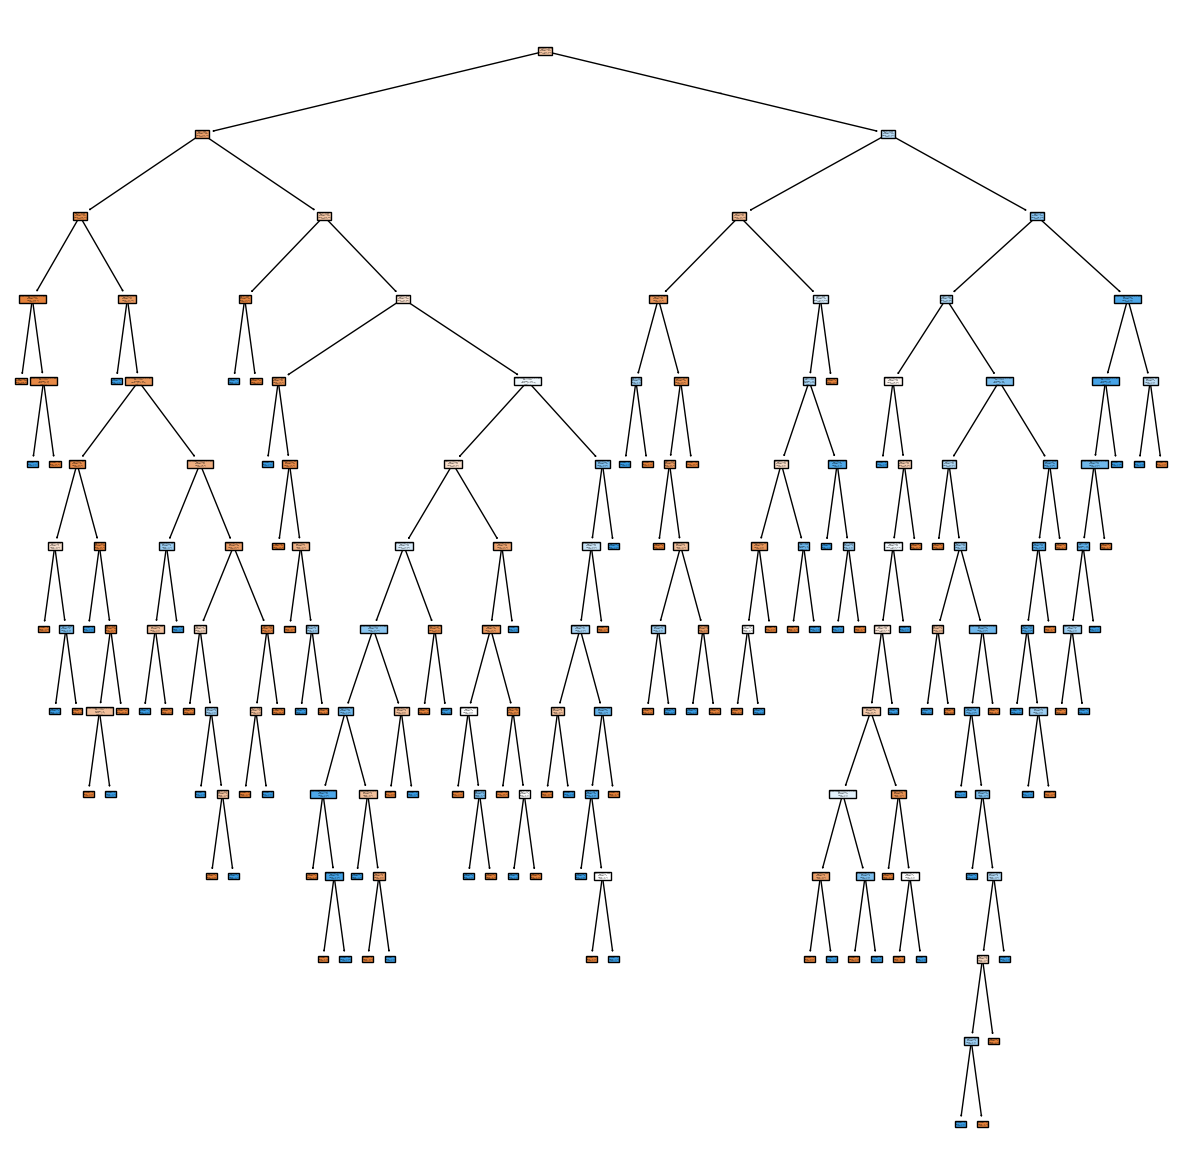

In [14]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
plt.show()

In [15]:
#Predicting y

y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [16]:
print(f"The accuracy score for the model is: {accuracy_score(y_test, y_pred)}")
print(f"The F1 score for the model is: {f1_score(y_test, y_pred)}")


The accuracy score for the model is: 0.7467532467532467
The F1 score for the model is: 0.6722689075630253


In [17]:
#Random search hyperparams

parameters = {
              'max_depth':[1,2,3,4,5],
              'min_samples_leaf':[1,2,3,4,5],
              'min_samples_split':[2,3,4,5],
              'criterion' : ['gini','entropy']
             }
scorer = make_scorer(f1_score)

In [18]:
rdm = RandomizedSearchCV(model, parameters, scoring=scorer)

In [19]:
#Fitting the model to our data

rdm_fit = rdm.fit(X_train, y_train)
rdm_fit

/home/vscode/.local/lib/python3.10/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5]},
                   scoring=make_scorer(f1_score, response_method='predict'))

In [20]:
bst = rdm_fit.best_estimator_
bst

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4,
                       min_samples_split=5, random_state=42)

In [21]:
#Predicting under Random Estimator

rdm_train_pred = bst.predict(X_train)
rdm_test_pred = bst.predict(X_test)

In [22]:
print(f"The Training F1 Score is:  {f1_score(rdm_train_pred, y_train)}")
print(f"The Testing F1 Score is: {f1_score(rdm_test_pred, y_test)}")

The Training F1 Score is:  0.7342799188640974
The Testing F1 Score is: 0.65625


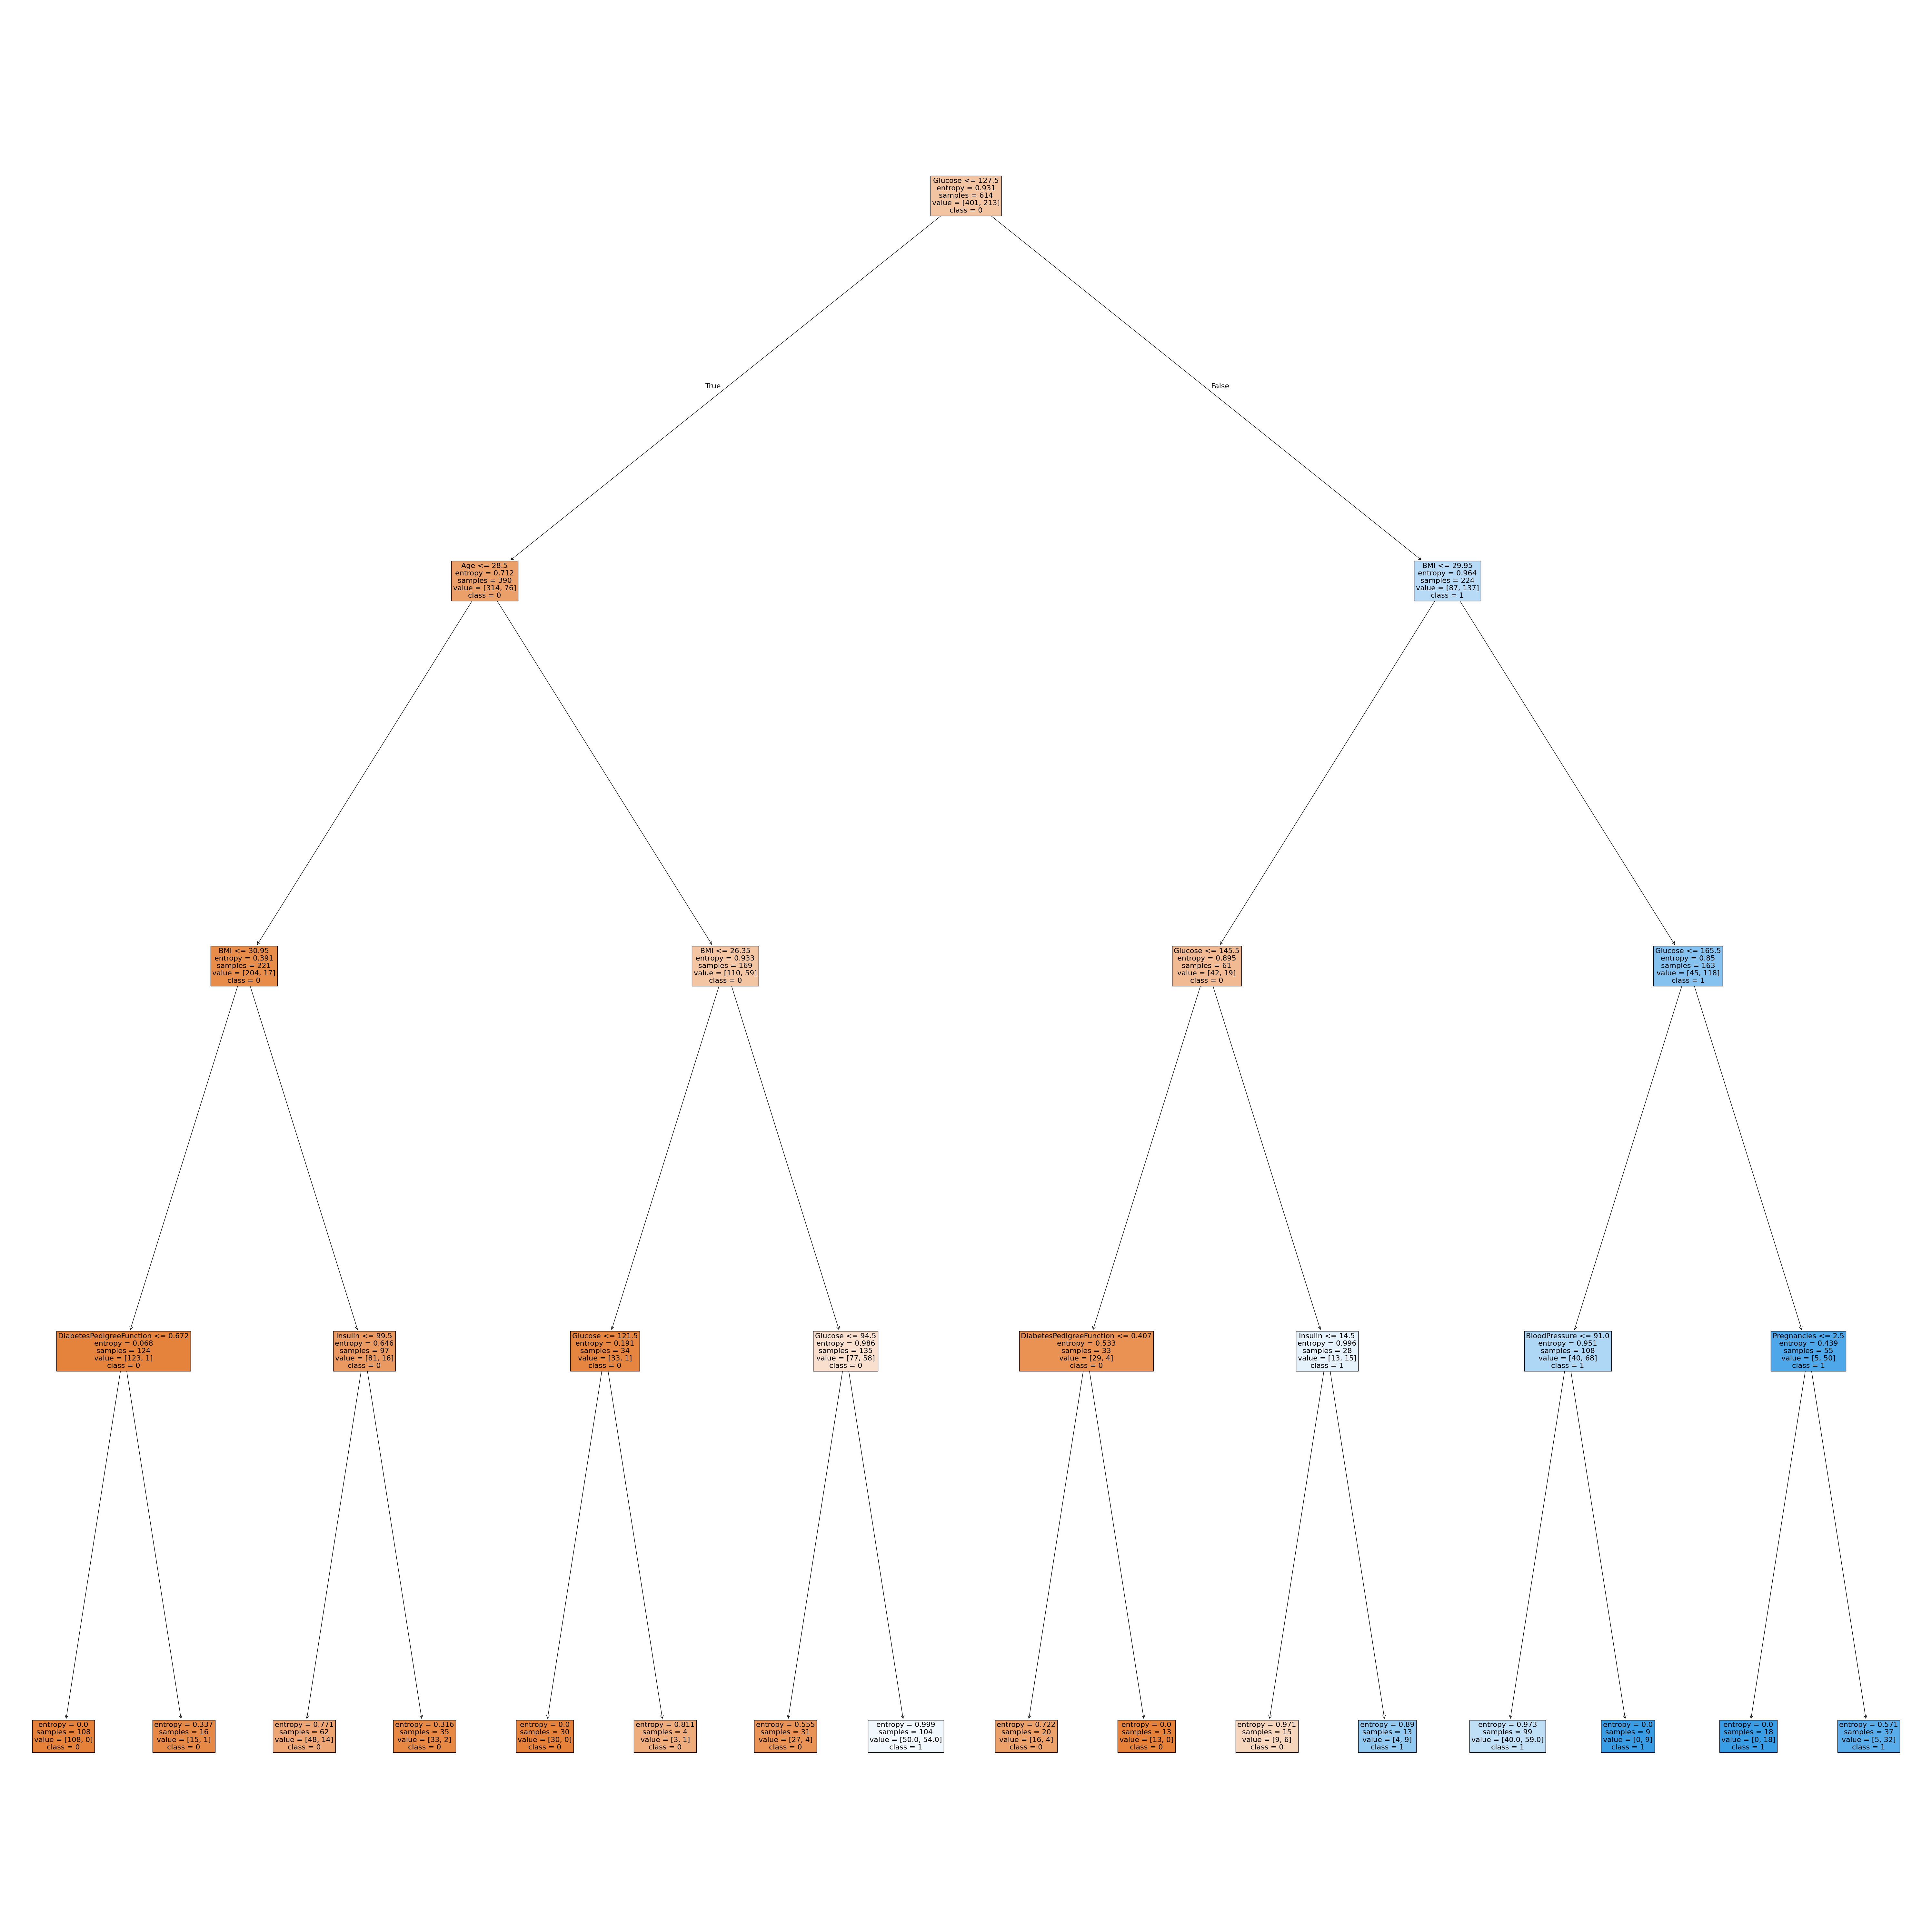

In [23]:
fig = plt.figure(figsize=(60,60))

tree.plot_tree(bst, feature_names = list(X_train.columns), class_names = ["0", "1"],fontsize=16, filled = True)
plt.savefig("diabetes_best.jpg")
plt.tight_layout()
plt.show()
